In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as srn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,recall_score,precision_score,r2_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('cardio_train.csv', sep = ";")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

In [5]:
data.columns = ['Id', 'Age', 'Gender', 'Height', 'Weight', 'Systolic blood pressure',
                 'Diastolic blood pressure', 'Cholesterol', 'Gluc', 'Smoke', 'Alco', 
                 'Active','Cardio']

In [6]:
data.head()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
print(data.dtypes)

Id                            int64
Age                           int64
Gender                        int64
Height                        int64
Weight                      float64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Cholesterol                   int64
Gluc                          int64
Smoke                         int64
Alco                          int64
Active                        int64
Cardio                        int64
dtype: object


In [8]:
data['Age'] = data['Age']//365
data.head()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
data['Height'] = data['Height']/100
data.head()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

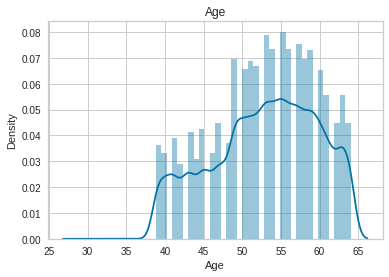

In [10]:
srn.distplot(data['Age']).set_title('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Height')

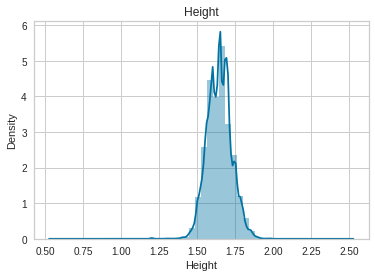

In [11]:

srn.distplot(data['Height']).set_title('Height')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight')

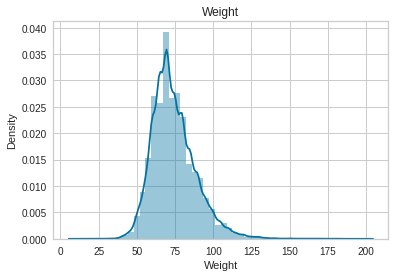

In [12]:

srn.distplot(data['Weight']).set_title('Weight')

In [13]:
data.isnull().sum()

Id                          0
Age                         0
Gender                      0
Height                      0
Weight                      0
Systolic blood pressure     0
Diastolic blood pressure    0
Cholesterol                 0
Gluc                        0
Smoke                       0
Alco                        0
Active                      0
Cardio                      0
dtype: int64

In [14]:
data[data.duplicated(['Id'],keep=False)]

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio


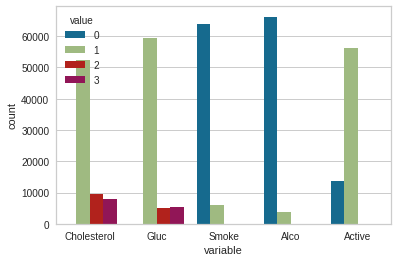

In [15]:
data_categorical = data.loc[:,['Cholesterol','Gluc', 'Smoke', 'Alco', 'Active']]
srn.countplot(x="variable", hue = 'value', data= pd.melt(data_categorical));

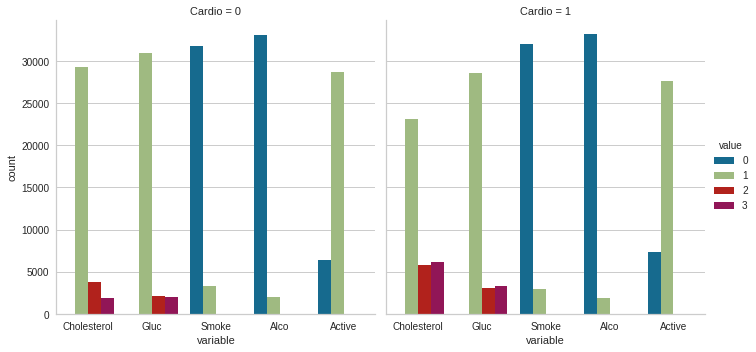

In [16]:
data_long = pd.melt(data, id_vars=['Cardio'], value_vars=['Cholesterol','Gluc', 'Smoke', 'Alco', 'Active'])
srn.catplot(x="variable", hue="value", col="Cardio",
                data=data_long, kind="count");

In [17]:
data.groupby('Gender')['Height'].mean()

Gender
1    1.613556
2    1.699479
Name: Height, dtype: float64

In [18]:
data['Gender'].value_counts()

1    45530
2    24470
Name: Gender, dtype: int64

In [19]:
data.groupby('Gender')['Alco'].sum()

Gender
1    1161
2    2603
Name: Alco, dtype: int64

In [20]:
data['Cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: Cardio, dtype: float64

In [21]:
pd.crosstab(data['Cardio'],data['Gender'],normalize=True)

Gender,1,2
Cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


In [22]:
data.describe()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data.loc[(data['Height']<1.40)|(data['Height']>2.2)]



,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
224,309,59,2,0.76,55.0,120,80,1,1,0,0,1,0
2412,3399,61,2,1.38,52.0,140,100,1,1,0,0,1,1
2944,4150,53,1,1.34,52.0,120,70,1,1,0,0,0,0
3208,4523,50,1,1.36,57.0,120,80,1,1,0,0,1,0
3420,4838,39,1,1.00,70.0,100,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66479,94906,46,2,1.10,90.0,110,90,1,1,0,0,1,0
66643,95141,51,1,0.57,61.0,130,90,1,1,0,0,1,1
67866,96921,59,1,1.33,123.0,180,100,2,1,0,0,1,1
69052,98630,55,2,1.20,80.0,140,90,1,2,0,0,1,1


In [24]:
mediana = sts.median(data['Height'])
mediana

1.65

In [25]:
data.loc[(data['Height']<1.4)|(data['Height']>2.2),'Height']=mediana

In [26]:
data.loc[(data['Height']<1.40)|(data['Height']>2.2)]


,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio


In [27]:
data['Height'].describe()

count    70000.000000
mean         1.644656
std          0.078053
min          1.400000
25%          1.590000
50%          1.650000
75%          1.700000
max          2.070000
Name: Height, dtype: float64

In [28]:
data.loc[(data['Weight']<55)|(data['Weight']>140)]

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
17,27,45,1,1.58,52.0,110,70,1,3,0,0,1,0
23,33,64,2,1.56,45.0,110,60,1,1,0,0,1,0
44,59,54,1,1.54,50.0,170,80,3,1,0,0,1,1
69,94,57,1,1.57,53.0,110,70,1,1,0,0,0,1
80,109,45,1,1.59,49.0,120,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69912,99861,43,1,1.55,48.0,90,70,1,1,0,0,1,0
69919,99871,47,1,1.59,45.0,110,70,2,2,0,0,1,0
69937,99908,39,1,1.60,53.0,90,60,1,1,0,0,1,0
69961,99948,45,1,1.61,50.0,110,75,1,1,0,0,1,0


In [29]:
mediana = sts.median(data['Weight'])
mediana

72.0

In [30]:
data.loc[(data['Weight']<55)|(data['Weight']>140),'Weight']=mediana
data.loc[(data['Weight']<55)|(data['Weight']>140)]

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio


In [31]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['Diastolic blood pressure']> data['Systolic blood pressure']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


In [32]:
data.drop(data[(data['Systolic blood pressure'] > data['Systolic blood pressure'].quantile(0.975)) | (data['Systolic blood pressure'] < data['Systolic blood pressure'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['Diastolic blood pressure'] > data['Diastolic blood pressure'].quantile(0.975)) | (data['Diastolic blood pressure'] < data['Diastolic blood pressure'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


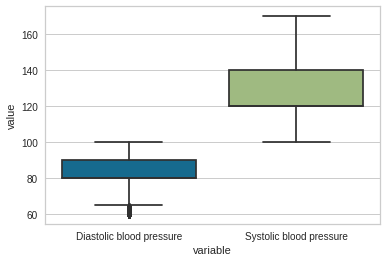

In [33]:
blood_pressure = data.loc[:,['Diastolic blood pressure','Systolic blood pressure']]
srn.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['Diastolic blood pressure']> data['Systolic blood pressure']].shape[0]))

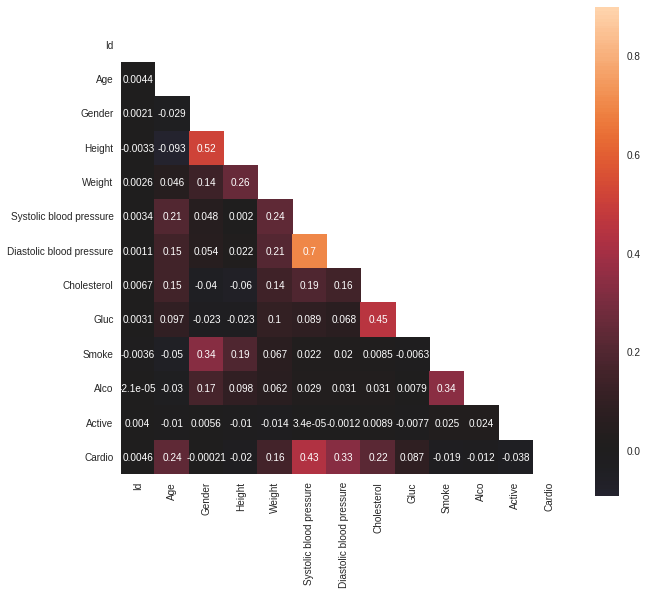

In [34]:
correlation = data.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 9))
plot = srn.heatmap(correlation, mask = mask, vmax=.9, center = 0, annot = True, square = True)
    

In [35]:
x = data.iloc[:,0:12].values
y = data.iloc[:,12].values


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [37]:
dtc = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [38]:
predict = dtc.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
confusion = confusion_matrix(y_test, predict)
confusion

array([[6492, 3639],
       [3652, 6075]])

In [40]:
print ('Accuracy:', accuracy_score(y_test, predict))
print ('F1 score:', f1_score(y_test, predict))
print ('Recall:', recall_score(y_test, predict))
print ('Precision:', precision_score(y_test, predict))


Accuracy: 0.6328431866250378
F1 score: 0.6249678514479707
Recall: 0.6245502210342346
Precision: 0.6253860407659049


In [41]:
cross_validate(dtc, x, y, cv=10,scoring='accuracy', return_train_score=True)

{'fit_time': array([0.6597693 , 0.66863465, 0.6478138 , 0.65158677, 0.6709764 ,
        0.62069392, 0.67785621, 0.63693404, 0.65267253, 0.66777682]),
 'score_time': array([0.00248742, 0.0032897 , 0.00328946, 0.00350451, 0.00350833,
        0.00345063, 0.00365448, 0.00344038, 0.00319552, 0.00245953]),
 'test_score': array([0.6102719 , 0.6255287 , 0.61601208, 0.63136425, 0.61232815,
        0.62592537, 0.62788941, 0.64193987, 0.62456564, 0.62320592]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [42]:
Accuracy =[0.61767372, 0.631571  , 0.61450151, 0.63015561, 0.60537846,
        0.62773833, 0.62713401, 0.64239311, 0.62864481, 0.62516997]
np.mean(Accuracy)

0.6250360529999999

In [43]:
cross_validate(dtc, x, y, cv=10,scoring='f1', return_train_score=True)

{'fit_time': array([0.65036774, 0.6777699 , 0.64951754, 0.67314529, 0.6821928 ,
        0.61925578, 0.66192389, 0.63016725, 0.6563952 , 0.65266061]),
 'score_time': array([0.00502038, 0.00569224, 0.00593996, 0.00598383, 0.00636292,
        0.00600243, 0.00626707, 0.00606799, 0.00602603, 0.0050323 ]),
 'test_score': array([0.64901934, 0.6025974 , 0.60356866, 0.63300793, 0.61360875,
        0.63242519, 0.61507382, 0.63559832, 0.62586466, 0.65009997]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [44]:
F1 = [0.64698579, 0.60499266, 0.6087362 , 0.63520486, 0.61769566,
        0.63162584, 0.61552824, 0.6391377 , 0.62462098, 0.63884477]
np.mean(F1)

0.62633727

In [45]:
cross_validate(dtc, x, y, cv=10,scoring='recall', return_train_score=True)

{'fit_time': array([0.6449945 , 0.66992235, 0.64749599, 0.64363122, 0.68079925,
        0.62875915, 0.6648519 , 0.63367939, 0.65240932, 0.67094851]),
 'score_time': array([0.00718045, 0.0060668 , 0.00582814, 0.00600195, 0.00587749,
        0.006109  , 0.00626802, 0.0061717 , 0.00578713, 0.00527358]),
 'test_score': array([0.72080907, 0.56696292, 0.5917867 , 0.62783568, 0.62170448,
        0.6578786 , 0.6076027 , 0.64511186, 0.6328532 , 0.68342017]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [46]:
Recall = [0.72019614, 0.57676984, 0.58504444, 0.62998161, 0.62446352,
        0.65757204, 0.6091355 , 0.64603126, 0.62703034, 0.69261416]
np.mean(Recall)

0.636883885

In [47]:
cross_validate(dtc, x, y, cv=10,scoring='precision', return_train_score=True)

{'fit_time': array([0.64879203, 0.66255784, 0.64744449, 0.66026592, 0.68311119,
        0.62372041, 0.67494583, 0.66390133, 0.65941381, 0.6523757 ]),
 'score_time': array([0.00512791, 0.00572443, 0.00585032, 0.00607133, 0.00594616,
        0.00609684, 0.00624418, 0.00609422, 0.00583744, 0.00502944]),
 'test_score': array([0.58605341, 0.64004114, 0.61655085, 0.61739916, 0.60490871,
        0.61742643, 0.62519636, 0.63737923, 0.6194075 , 0.60551948]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [48]:
Precision = [0.58888058, 0.64260809, 0.61212887, 0.62552301, 0.60840188,
        0.62072993, 0.62152018, 0.63231282, 0.61452184, 0.60925875]
np.mean(Precision)

0.617588595